In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other 11th,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education,Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle,Basic Ed 1st Cycle,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 2nd Cycle,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.shape

(4424, 37)

# Removing duplicate instances (if exist)

In [4]:
df.drop_duplicates()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other 11th,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education,Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle,Basic Ed 1st Cycle,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 2nd Cycle,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,7th choice,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education,Secondary Education,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education,Secondary Education,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,2nd choice,Nursing,daytime,Secondary education,154.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,2nd choice,Management,daytime,Secondary education,180.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# dealing with null values

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

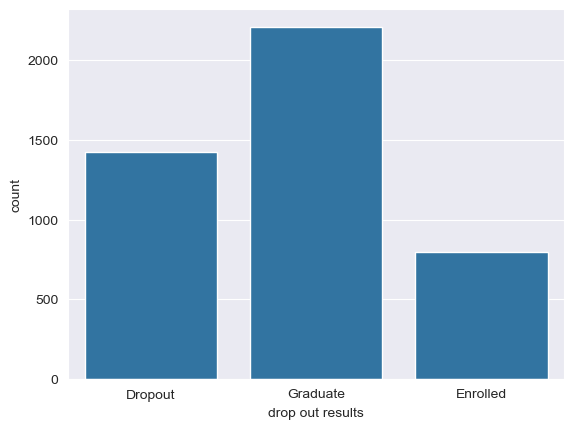

In [6]:
sns.countplot(x='Target', data=df)
plt.xlabel('drop out results')
plt.ylabel('count')
plt.show()

enrolled class will be dropped as we are concerned only about dop outs & graduates only 

In [7]:
df.shape

(4424, 37)

In [8]:
df = df[df['Target'] != 'Enrolled']

In [9]:
df.shape

(3630, 37)

In [10]:
df['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

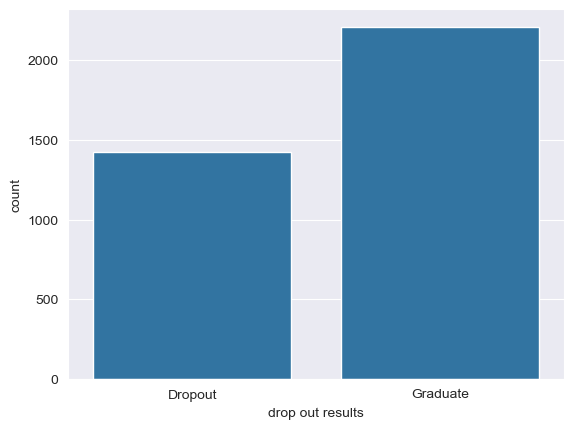

In [11]:
sns.countplot(x='Target', data=df)
plt.xlabel('drop out results')
plt.ylabel('count')
plt.show()

# splitting features into categorical & numerical

In [12]:
features_data = df.iloc[:, :-1]
target_data = df.iloc[:, -1]

In [13]:
features_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other 11th,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,single,International student (bachelor),2nd choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education,Degree,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,single,1st phase - general contingent,6th choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle,Basic Ed 1st Cycle,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 2nd Cycle,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [14]:
target_data.head()

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

In [15]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   object 
 1   Application mode                                3630 non-null   object 
 2   Application order                               3630 non-null   object 
 3   Course                                          3630 non-null   object 
 4   Daytime/evening attendance                      3630 non-null   object 
 5   Previous qualification                          3630 non-null   object 
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   object 
 8   Mother's qualification                          3630 non-null   object 
 9   Father's qualification                        

In [16]:
categorical_data = features_data.select_dtypes(include='object')
categorical_data.head()      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,daytime,Secondary education,Portuguese,Basic Ed 3rd Cycle,Other 11th,Services/Security/Sales,Unskilled Workers,yes,no,no,yes,male,no,no
1,single,International student (bachelor),2nd choice,Tourism,daytime,Secondary education,Portuguese,Secondary Education,Degree,Technicians,Technicians,yes,no,no,no,male,no,no
2,single,1st phase - general contingent,6th choice,Communication Design,daytime,Secondary education,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,Unskilled Workers,Unskilled Workers,yes,no,no,no,male,no,no
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,Portuguese,Basic Ed 2nd Cycle,Basic Ed 1st Cycle,Services/Security/Sales,Technicians,yes,no,no,yes,female,no,no
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),evening,Secondary education,Portuguese,Basic Ed 1st Cycle,Basic Ed 2nd Cycle,Unskilled Workers,Unskilled Workers,no,no,no,yes,female,no,no


In [17]:
numerical_data = features_data.select_dtypes(include='number')
numerical_data.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


#  Plotting Categorical Features

In [18]:
def plot_categorical_data(category: str, hue = False, width = 10, height = 12):  
    plt.figure(figsize = (width, height))
    sns.countplot(y = categorical_data[category], data = categorical_data, hue = df['Target'] if hue else None)
    plt.ylabel(f"{category}s")
    plt.xlabel("count")
    plt.legend()
    plt.grid(True)

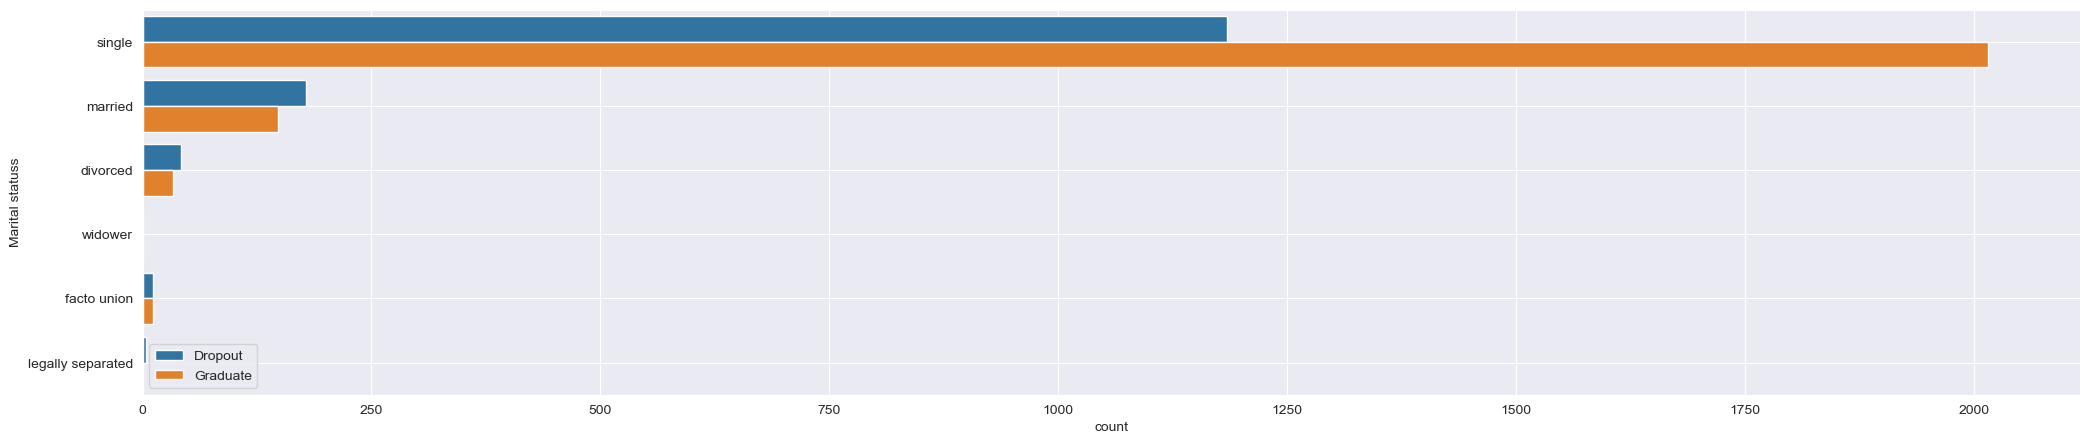

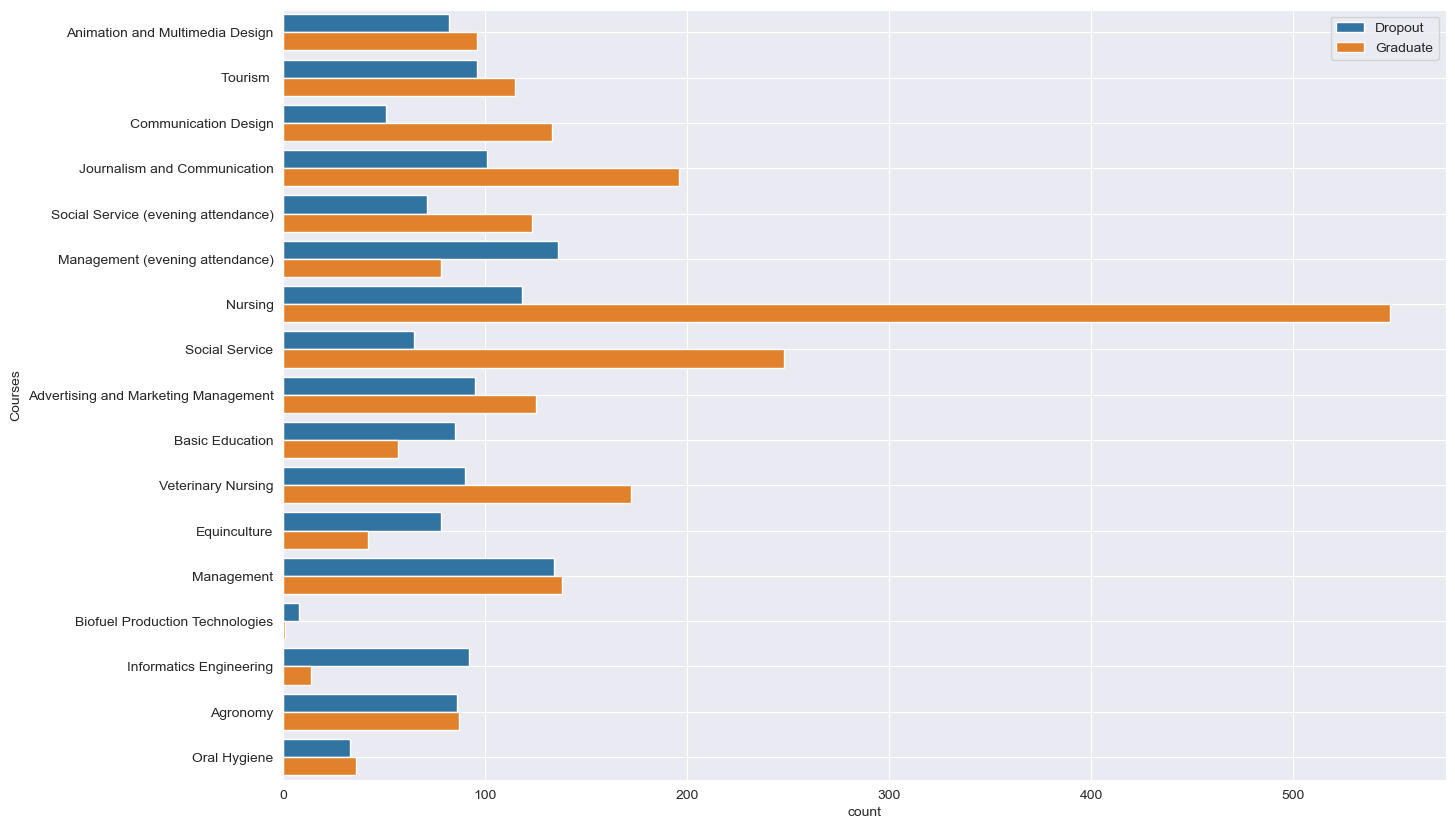

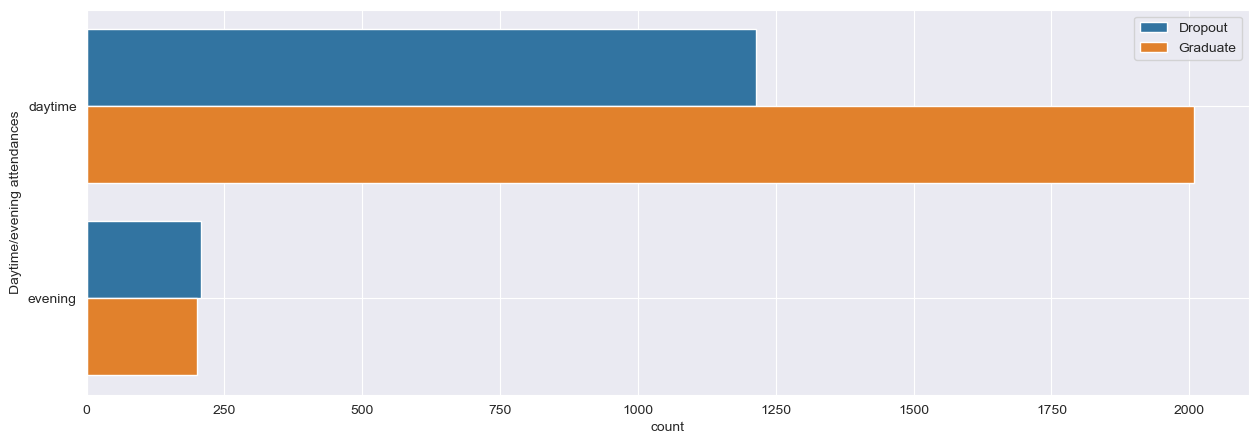

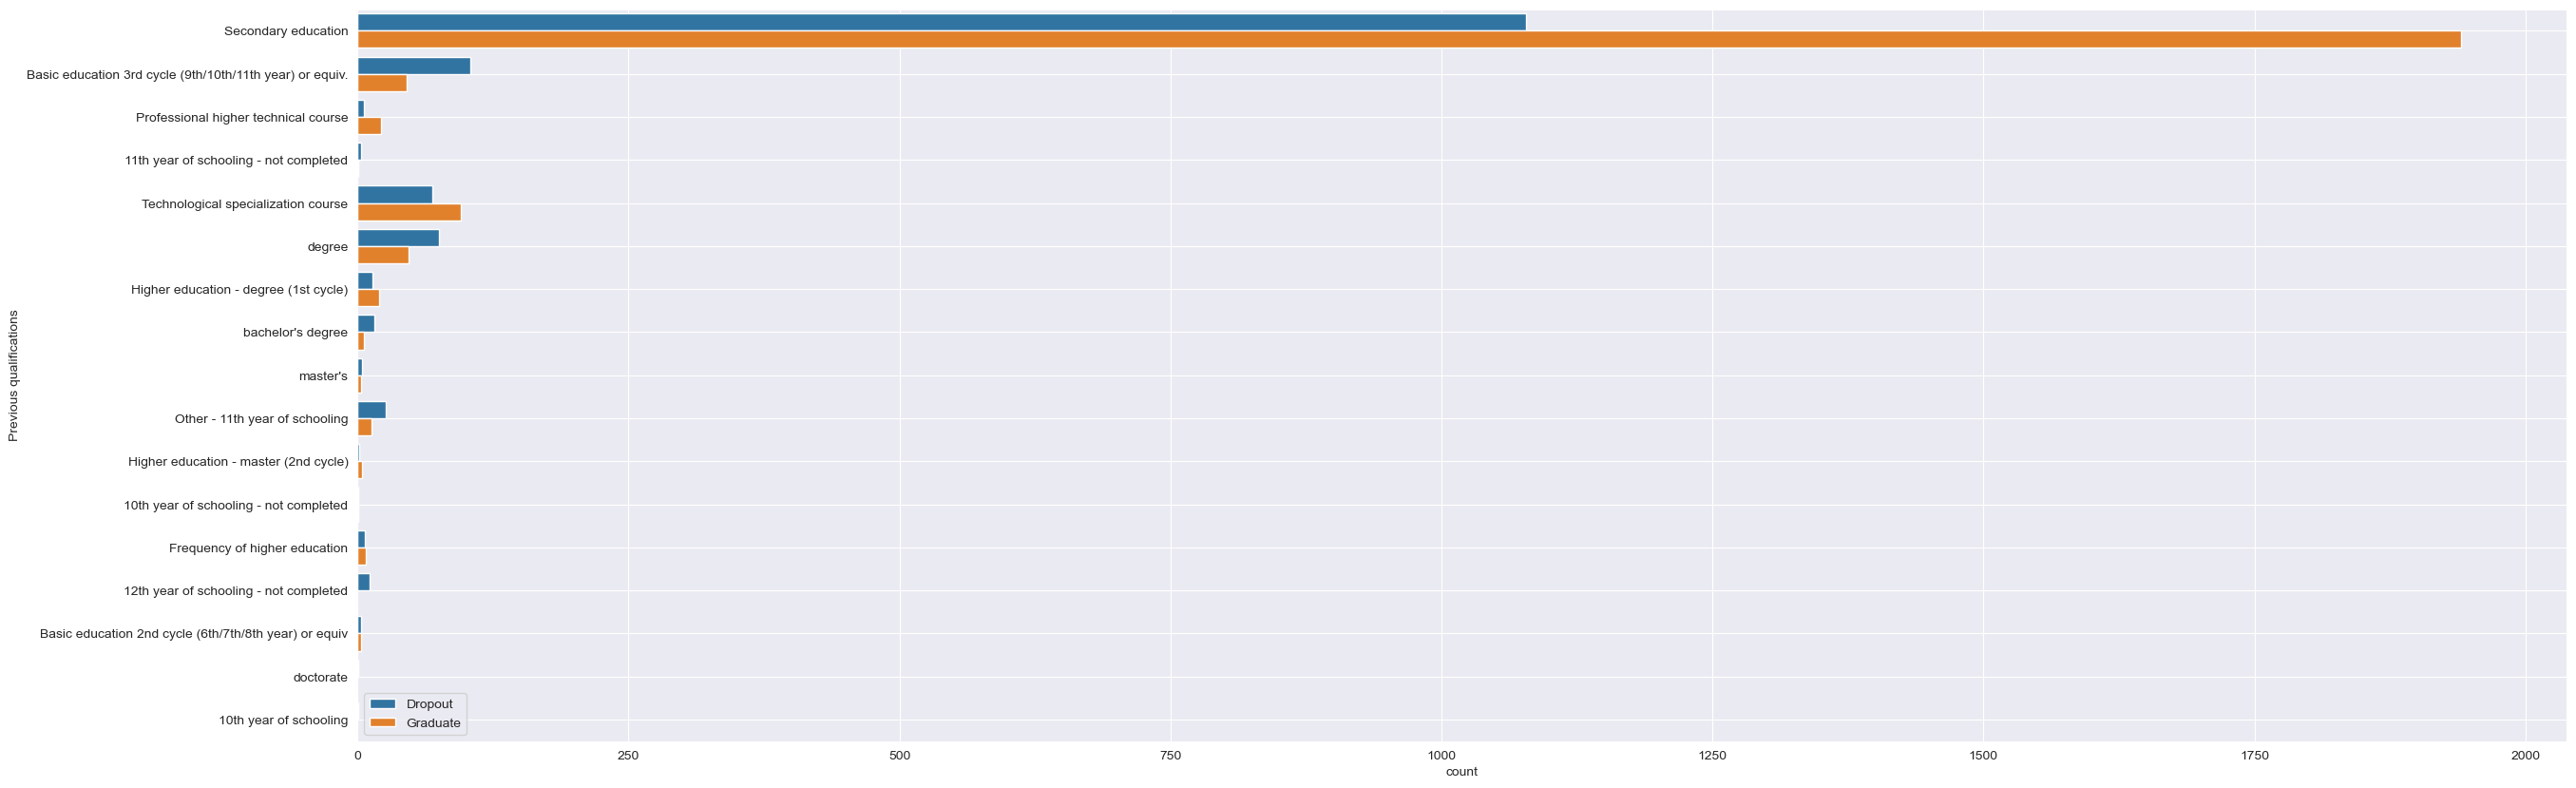

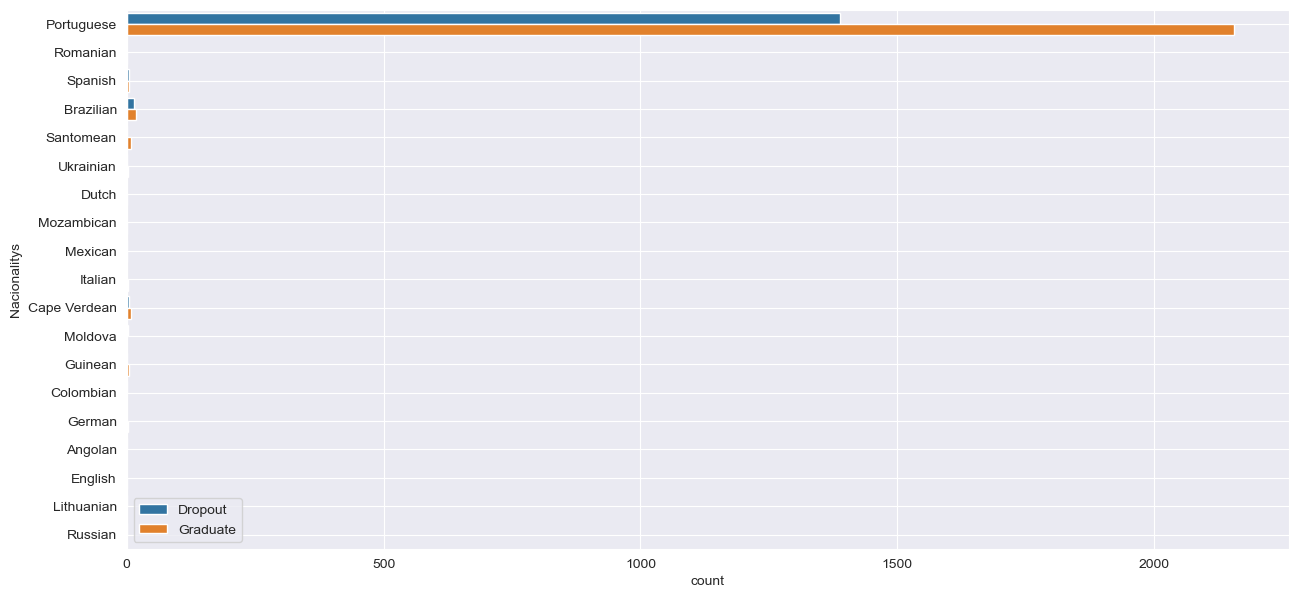

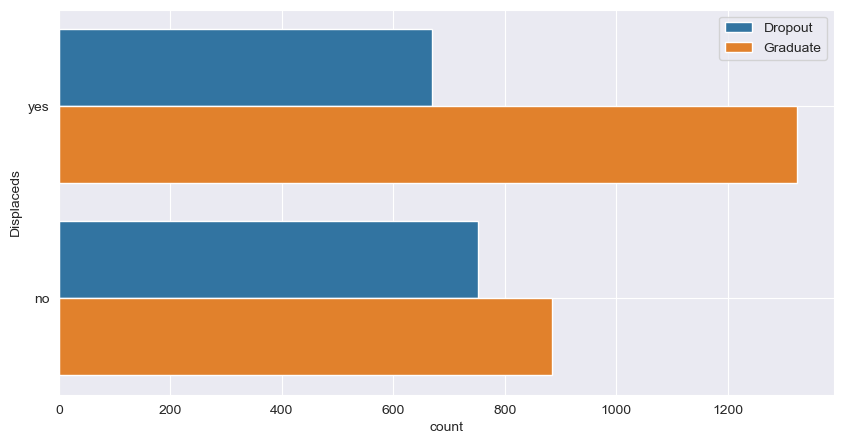

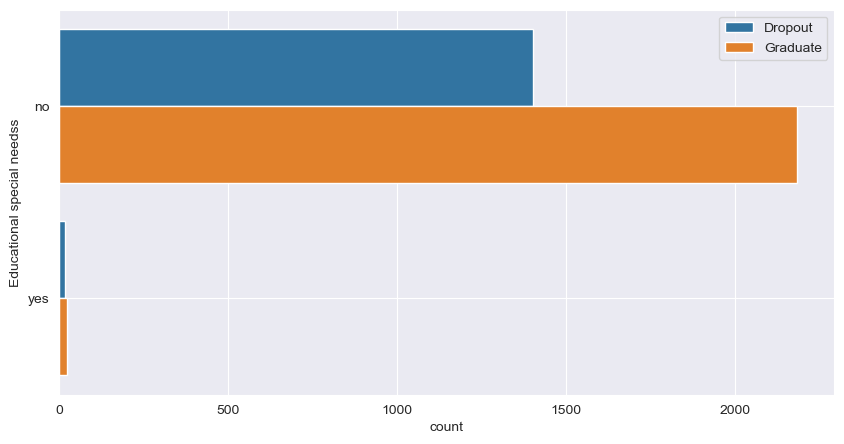

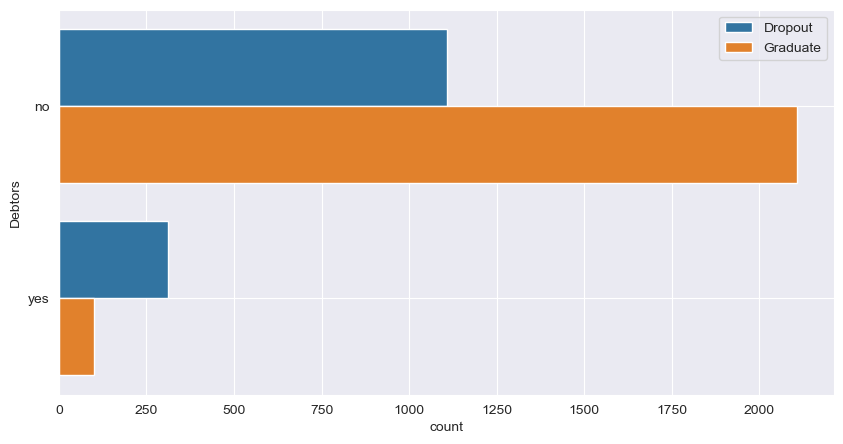

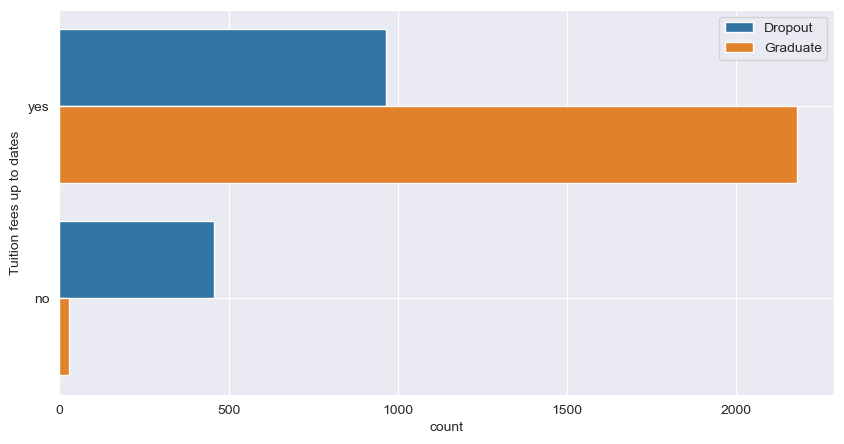

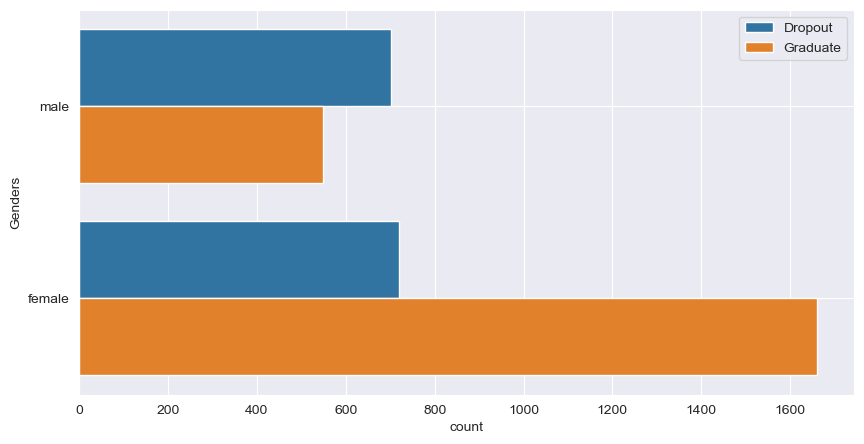

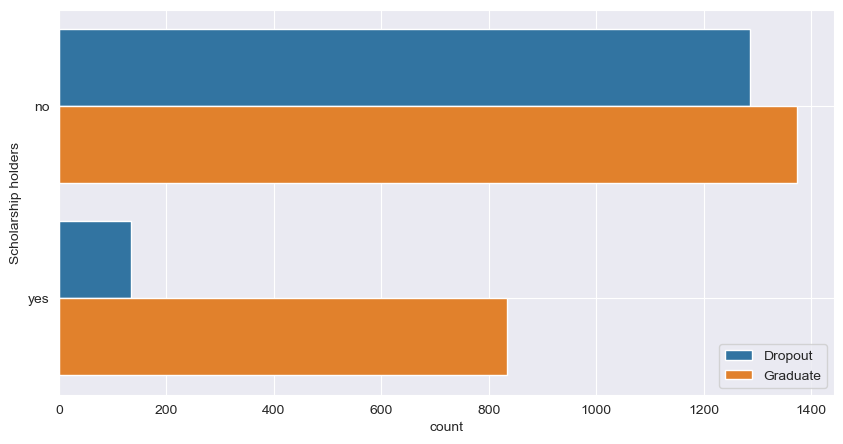

In [19]:
plot_categorical_data('Marital status', hue = True, width = 25, height = 5)
plot_categorical_data('Course', hue = True, width = 15, height = 10)
plot_categorical_data('Daytime/evening attendance', hue = True, width = 15, height = 5)
plot_categorical_data('Previous qualification', hue = True, width = 30, height = 10)
plot_categorical_data('Nacionality', hue = True, width = 15, height = 7)
plot_categorical_data('Displaced', hue = True, width = 10, height = 5)
plot_categorical_data('Educational special needs', hue = True, width = 10, height = 5)
plot_categorical_data('Debtor', hue = True, width = 10, height = 5)
plot_categorical_data('Tuition fees up to date', hue = True, width = 10, height = 5)
plot_categorical_data('Gender', hue = True, width = 10, height = 5)
plot_categorical_data('Scholarship holder', hue = True, width = 10, height = 5)

max grads are from nursing and min drop outs are from management

student of evening time attendances have high probability to drop out over day time attendance students

females are more probable to complete their education over boys who are more likely to drop out 

# Plotting Numerical Distributions

In [20]:
def plot_numerical_distributions(df: pd.DataFrame, num_cols=None, cols_per_row=5, width=5, height=4):

    total_plots = len(num_cols)
    rows = (total_plots + cols_per_row - 1) // cols_per_row  # ceiling division

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * width, rows * height))
    axes = axes.flatten() 
    
    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='teal', alpha=0.6)
        axes[i].set_title(col)
        
    plt.tight_layout()
    plt.show()

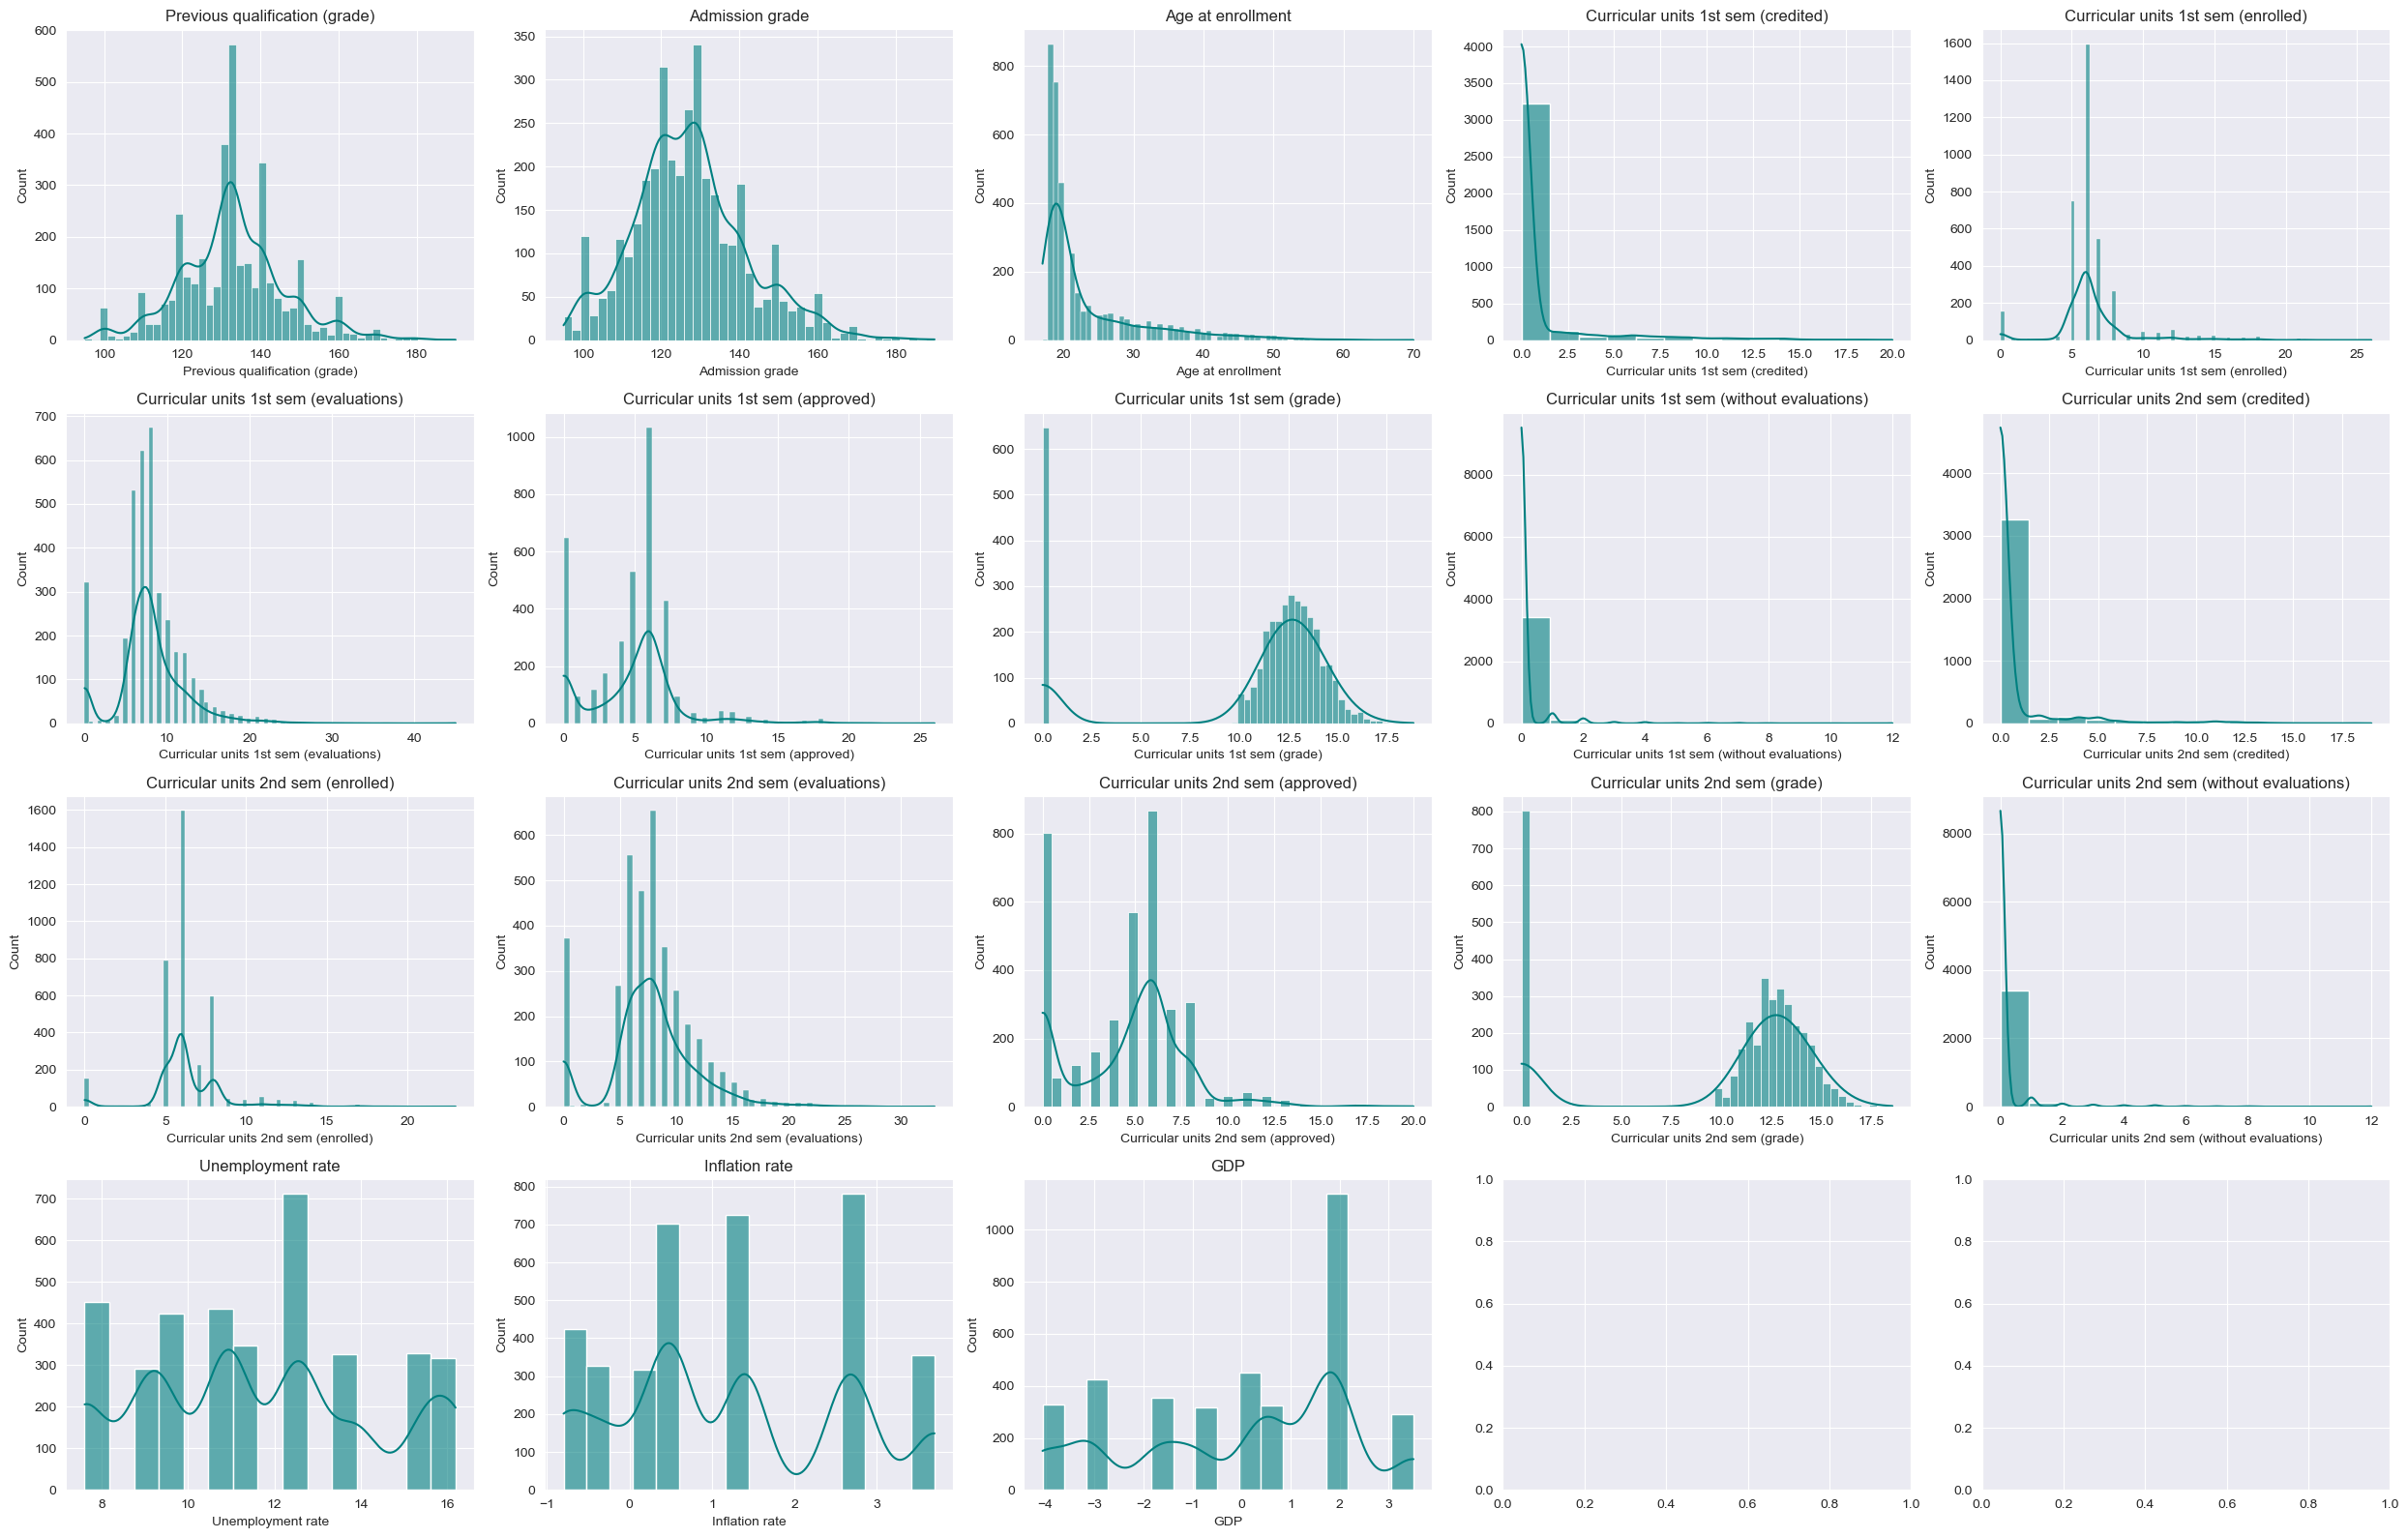

In [21]:
plot_numerical_distributions(numerical_data, numerical_data.columns)

# dropping columns of irrelevant features 

In [22]:
print(f"ordinal df shape: {categorical_data.shape}")
print(f"Numerical df shape: {numerical_data.shape}")

ordinal df shape: (3630, 18)
Numerical df shape: (3630, 18)


In [23]:
numerical_to_drop = [
    'Unemployment rate'
]
categorical_to_drop = [
    'International',
    'Application mode',
]

numerical_data.drop(numerical_to_drop, axis = 1, inplace = True)
categorical_data.drop(categorical_to_drop, axis = 1, inplace = True)

In [24]:
print(f"categorical df shape: {categorical_data.shape}")
print(f"Numerical df shape: {numerical_data.shape}")

categorical df shape: (3630, 16)
Numerical df shape: (3630, 17)


# Feature Engineering for student's academic scores

features of "Curricular Units 1st Semester" will be used to extract new features and dropping some to increase quality of data

1.  increase ratio in grade = (sem_1 grade + sem_2 grade) / admission grade
2.  grade per credit = grade / approved
3.  grade diff = grades difference (2nd vs 1st)
4.  improved (bool depends on grade_diff)
5.  cum approval rate = (approve + approve)/(eval+eval)
6.  gpa = ((evaluated credits sem 1 * sem 1 grade) + (evaluated credits of sem 2 * sem 2 grade)) / sum of evaluated credits of both semesters
7. age penalty = 1 / (enrollment age +1)
8. approved rate = approved /Evaluated

In [30]:
# Create a list to track added feature names
added_numerical_features = []
added_categorical_features = []

# Feature 1: Grade Increase Ratio
numerical_data['grade_increase_ratio'] = (
    numerical_data['Curricular units 1st sem (grade)'] + numerical_data['Curricular units 2nd sem (grade)']
) / ((numerical_data['Admission grade'] / 10) + 1e-5)
added_numerical_features.append('grade_increase_ratio')

# Feature 2: Grade per Credit (semester 1 & 2)
numerical_data['grade_per_credit_sem_1'] = (
    numerical_data['Curricular units 1st sem (grade)'] / (numerical_data['Curricular units 1st sem (approved)'] + 1e-5)
)
added_numerical_features.append('grade_per_credit_sem_1')

numerical_data['grade_per_credit_sem_2'] = (
    numerical_data['Curricular units 2nd sem (grade)'] / (numerical_data['Curricular units 2nd sem (approved)'] + 1e-5)
)
added_numerical_features.append('grade_per_credit_sem_2')

# Feature 3: Grade Difference & Improvement Indicator
numerical_data['grade_diff'] = (
    numerical_data['Curricular units 2nd sem (grade)'] - numerical_data['Curricular units 1st sem (grade)']
)
added_numerical_features.append('grade_diff')

categorical_data['improved'] = (numerical_data['grade_diff'] > 0).astype(int)
added_categorical_features.append('improved')

# Feature 4: Cumulative Approval Rate
numerical_data['cumulative_approval_rate'] = (
    numerical_data['Curricular units 1st sem (approved)'] + numerical_data['Curricular units 2nd sem (approved)']
) / (
    numerical_data['Curricular units 1st sem (evaluations)'] + numerical_data['Curricular units 2nd sem (evaluations)'] + 1e-5
)
added_numerical_features.append('cumulative_approval_rate')

# Feature 6: Grade Quality Index (weighted grade by approved credits)
numerical_data['grade_points_avg'] = (
    numerical_data['Curricular units 1st sem (grade)'] * numerical_data['Curricular units 1st sem (evaluations)'] +
    numerical_data['Curricular units 2nd sem (grade)'] * numerical_data['Curricular units 2nd sem (evaluations)']
) / (
    numerical_data['Curricular units 1st sem (evaluations)'] + numerical_data['Curricular units 2nd sem (evaluations)'] + 1e-5
)
added_numerical_features.append('grade_points_avg')

# Feature 7: Age Penalty (inverse of age at enrollment)
numerical_data['age_penalty'] = 1 / (numerical_data['Age at enrollment'] + 1)
added_numerical_features.append('age_penalty')

# Feature 8: Approval rate w.r.t evaluated credits
numerical_data['approved_rate_sem_1'] = numerical_data['Curricular units 1st sem (approved)'] / (numerical_data['Curricular units 1st sem (evaluations)'] + 1e-5)
added_numerical_features.append('approved_rate_sem_1')

numerical_data['approved_rate_sem_2'] = numerical_data['Curricular units 2nd sem (approved)'] / (numerical_data['Curricular units 2nd sem (evaluations)'] + 1e-5)
added_numerical_features.append('approved_rate_sem_2')

In [31]:
print(f"added numerical features: {added_numerical_features}")

added numerical features: ['grade_increase_ratio', 'grade_per_credit_sem_1', 'grade_per_credit_sem_2', 'grade_diff', 'cumulative_approval_rate', 'grade_points_avg', 'age_penalty', 'approved_rate_sem_1', 'approved_rate_sem_2']


In [32]:
numerical_data.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,GDP,grade_increase_ratio,grade_per_credit_sem_1,grade_per_credit_sem_2,grade_diff,cumulative_approval_rate,grade_points_avg,age_penalty,approved_rate_sem_1,approved_rate_sem_2
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,...,1.74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,...,0.79,1.941519,2.333329,2.277774,-0.333333,0.999999,13.833322,0.050000,0.999998,0.999998
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,...,1.74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,...,-3.12,2.159578,2.238092,2.479995,-1.028571,0.611111,12.857136,0.047619,0.749999,0.500000
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,...,0.79,1.790340,2.466662,2.166663,0.666667,0.733333,12.599992,0.021739,0.555555,0.999998


In [33]:
print(f"added categorical features: {added_categorical_features}")

added categorical features: ['improved']


In [34]:
categorical_data.head()

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,improved
0,single,6th choice,Animation and Multimedia Design,daytime,Secondary education,Portuguese,Basic Ed 3rd Cycle,Other 11th,Services/Security/Sales,Unskilled Workers,yes,no,no,yes,male,no,0
1,single,2nd choice,Tourism,daytime,Secondary education,Portuguese,Secondary Education,Degree,Technicians,Technicians,yes,no,no,no,male,no,0
2,single,6th choice,Communication Design,daytime,Secondary education,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,Unskilled Workers,Unskilled Workers,yes,no,no,no,male,no,0
3,single,3rd choice,Journalism and Communication,daytime,Secondary education,Portuguese,Basic Ed 2nd Cycle,Basic Ed 1st Cycle,Services/Security/Sales,Technicians,yes,no,no,yes,female,no,0
4,married,2nd choice,Social Service (evening attendance),evening,Secondary education,Portuguese,Basic Ed 1st Cycle,Basic Ed 2nd Cycle,Unskilled Workers,Unskilled Workers,no,no,no,yes,female,no,1


# encoding categorical features

In [35]:
ordinal_cols= ['Application order']
nominal_cols = [str(col) for col in categorical_data.columns if col not in ordinal_cols]

print(f"ordinal categories: {ordinal_cols}")
print(f"nominal categories: {nominal_cols}")

ordinal categories: ['Application order']
nominal categories: ['Marital status', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'improved']


In [36]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()

ordinal_encoded = ordinal_encoder.fit_transform(categorical_data[ordinal_cols])

ordinal_df = pd.DataFrame(ordinal_encoded, columns=ordinal_cols, index=categorical_data.index)

In [37]:
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

nominal_encoded = onehot_encoder.fit_transform(categorical_data[nominal_cols])

nominal_df = pd.DataFrame(nominal_encoded, columns = onehot_encoder.get_feature_names_out(nominal_cols), index = categorical_data.index)  

In [38]:
print(f"ordinal df shape: {ordinal_df.shape}")
print(f"nominal df shape: {nominal_df.shape}")

ordinal df shape: (3630, 1)
nominal df shape: (3630, 209)


# cleaning numerical features from outliers

In [39]:
melted = numerical_data.melt(var_name='Feature', value_name='Value')

selected_features = melted['Feature'].unique()[:2]

subset = melted[melted['Feature'].isin(selected_features)]

subset1 = melted[melted['Feature'].isin(melted['Feature'].unique()[:2])]
subset2 = melted[melted['Feature'].isin(melted['Feature'].unique()[2:3])]
subset3 = melted[melted['Feature'].isin(melted['Feature'].unique()[3:17])]
subset4 = melted[melted['Feature'].isin(melted['Feature'].unique()[17:18])]
subset5 = melted[melted['Feature'].isin(melted['Feature'].unique()[18:20])]
subset6 = melted[melted['Feature'].isin(melted['Feature'].unique()[20:21])]
subset7 = melted[melted['Feature'].isin(melted['Feature'].unique()[21:])]

In [40]:
def subset_boxplot(data_melted, width, height):
    plt.figure(figsize = (width ,height))
    sns.boxplot(data=data_melted, x='Value', y='Feature')
    plt.yticks(fontsize=10)

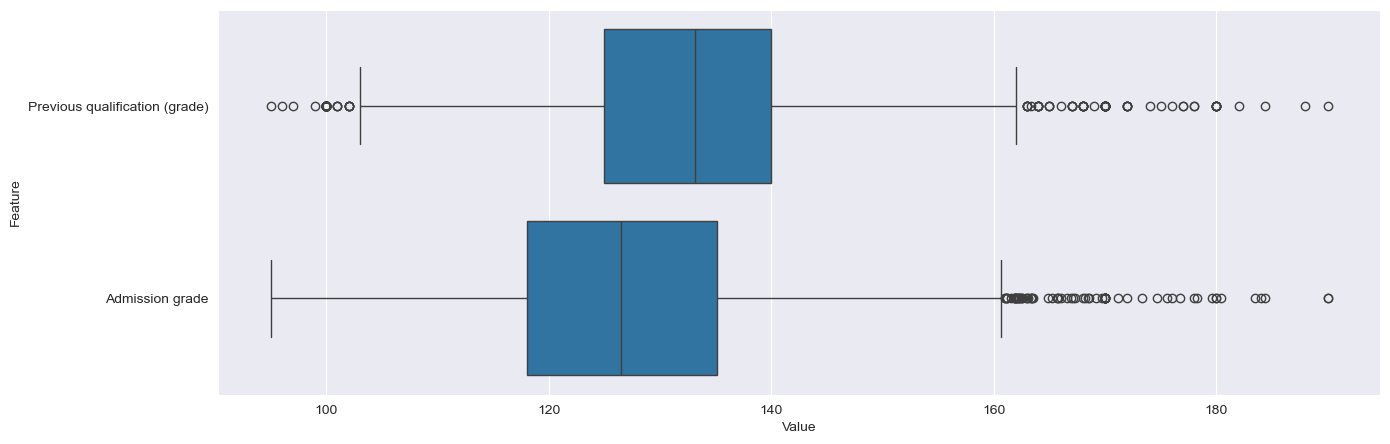

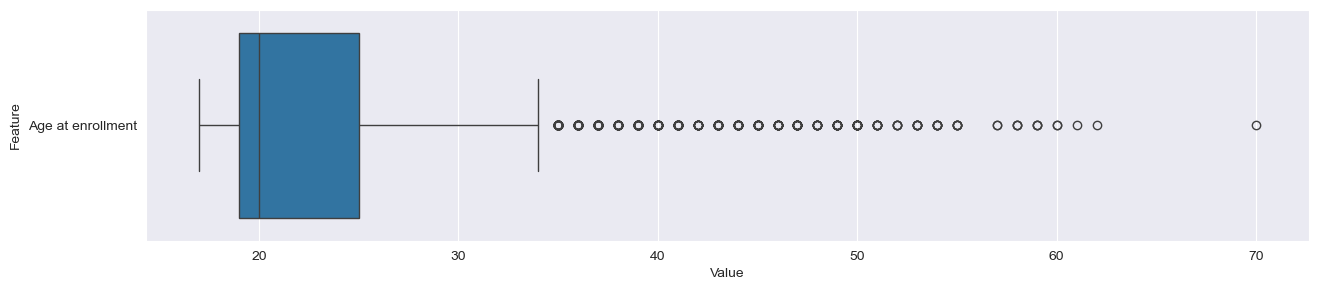

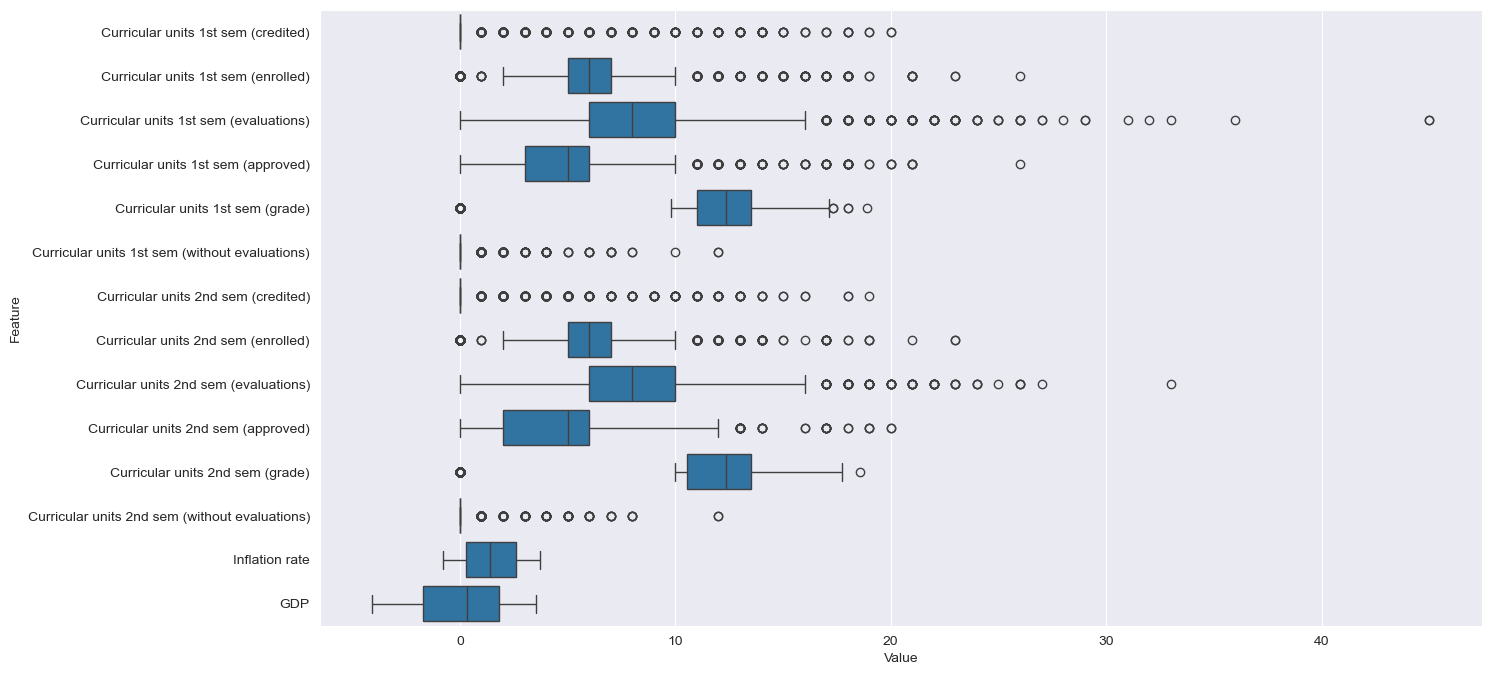

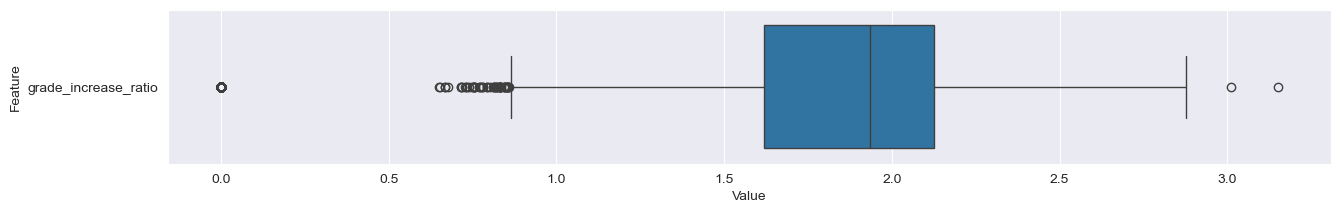

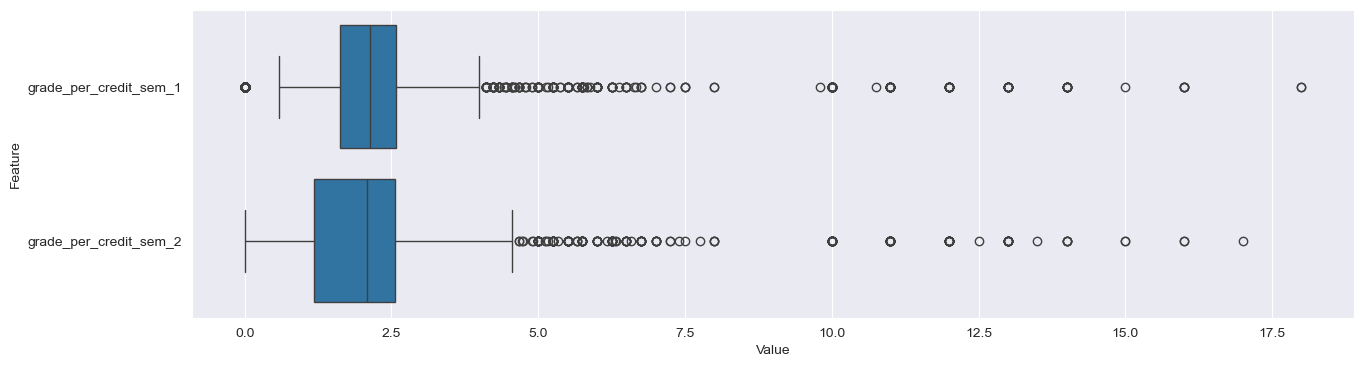

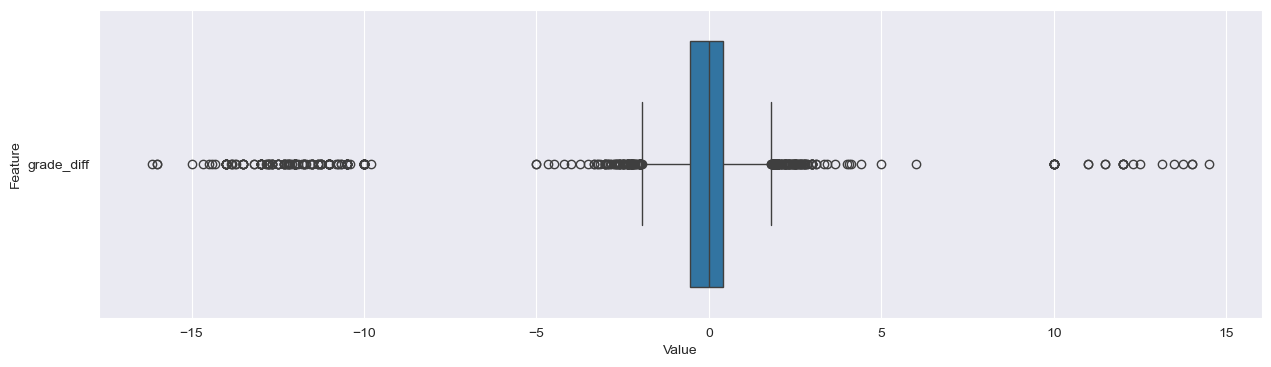

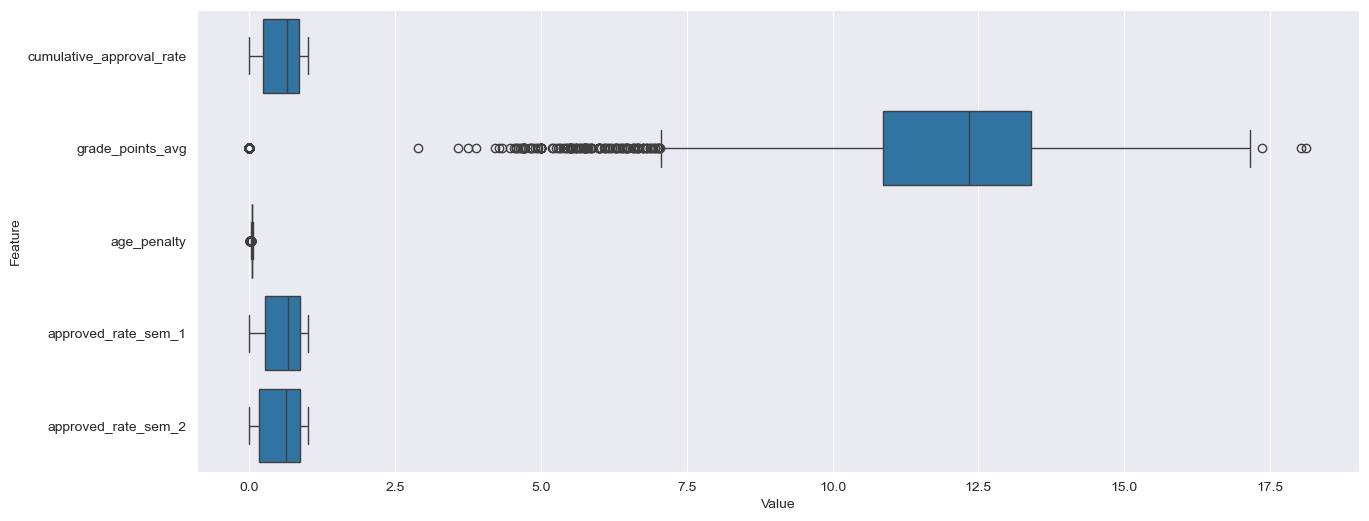

In [41]:
# varying plot window for clear resolution of graph
subset_boxplot(subset1, width = 15, height = 5)
subset_boxplot(subset2, width = 15, height = 3)
subset_boxplot(subset3, width = 15, height = 8)
subset_boxplot(subset4, width = 15, height = 2)
subset_boxplot(subset5, width = 15, height = 4)
subset_boxplot(subset6, width = 15, height = 4)
subset_boxplot(subset7, width = 15, height = 6)

not all outliers will be removed from data as records represent real world students taken across different nationalities

In [42]:
outliers_cols = [
                 'Previous qualification (grade)', 
                 'Age at enrollment', 
                 'Curricular units 1st sem (credited)',
                 'Curricular units 1st sem (enrolled)', 
                 'Curricular units 1st sem (evaluations)', 
                 'Curricular units 2nd sem (credited)',
                 'Curricular units 2nd sem (enrolled)', 
                 'Curricular units 2nd sem (evaluations)'
                ]
print(outliers_cols)

['Previous qualification (grade)', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)']


In [43]:
def iqr_detect(data, column_name):
    q3 = data[column_name].quantile(0.75)
    q1 = data[column_name].quantile(0.25)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    return lower_limit, upper_limit

In [44]:
def outliers_detect(data, columns):
    for col in columns:
        low_limit, up_limit = iqr_detect(data, col)
        if data[(data[col] > up_limit) | (data[col] < low_limit)].any(axis=None):
            number_of_outliers = data[(data[col] > up_limit) | (data[col] < low_limit)].shape[0]
            print(f"{col} ({low_limit}, {up_limit}): ", number_of_outliers, "outliers")

In [45]:
outliers_detect(numerical_data, outliers_cols)

Previous qualification (grade) (102.5, 162.5):  146 outliers
Age at enrollment (10.0, 34.0):  389 outliers
Curricular units 1st sem (credited) (0.0, 0.0):  480 outliers
Curricular units 1st sem (enrolled) (2.0, 10.0):  366 outliers
Curricular units 1st sem (evaluations) (0.0, 16.0):  136 outliers
Curricular units 2nd sem (credited) (0.0, 0.0):  447 outliers
Curricular units 2nd sem (enrolled) (2.0, 10.0):  321 outliers
Curricular units 2nd sem (evaluations) (0.0, 16.0):  81 outliers


In [46]:
def get_outlier_students(data,  columns):
    outlier_mask = pd.Series(False, index=data.index)

    for col in columns:
        low, high = iqr_detect(data, col)
        if col in columns:
            mask = (data[col] < low) | (data[col] > high)
            outlier_mask |= mask  # Combine masks: True if any condition is True
    
    return data[outlier_mask]

In [47]:
print(f"total number of outliers to be removed: {get_outlier_students(numerical_data, outliers_cols).shape[0]}")

total number of outliers to be removed: 1041


In [48]:
outlier_students = get_outlier_students(numerical_data, outliers_cols)

clean_numerical_data = numerical_data.drop(index = outlier_students.index)
clean_ordinal_data = ordinal_df.drop(index = outlier_students.index)
clean_nominal_data = nominal_df.drop(index = outlier_students.index)
clean_target_data = target_data.drop(index = outlier_students.index)

print(f"Original shape: {numerical_data.shape}")
print(f"Cleaned numerical data shape: {clean_numerical_data.shape}")
print(f"Cleaned nominal data shape: {clean_nominal_data.shape}")
print(f"Cleaned ordinal data shape: {clean_ordinal_data.shape}")
print(f"cleaned target shape: {clean_target_data.shape}")

Original shape: (3630, 26)
Cleaned numerical data shape: (2589, 26)
Cleaned nominal data shape: (2589, 209)
Cleaned ordinal data shape: (2589, 1)
cleaned target shape: (2589,)


# removing unused dummies of nominal categories

In [49]:
print(f"all uniques values in data: {clean_nominal_data.nunique().sum()}")
clean_nominal_data.nunique()

all uniques values in data: 392


Marital status_divorced             2
Marital status_facto union          2
Marital status_legally separated    2
Marital status_married              2
Marital status_single               2
                                   ..
Gender_male                         2
Scholarship holder_no               2
Scholarship holder_yes              2
improved_0                          2
improved_1                          2
Length: 209, dtype: int64

All dummies of nominal categorical features having a single unique value will be removed (which is 'No'), i.e. category hasn't been chosen for any student   

In [50]:
print(f"total features before removal: {clean_nominal_data.shape[1]}")

total features before removal: 209


In [51]:
dummies = nominal_df.columns


for i in dummies:
    if clean_nominal_data[i].nunique() == 1:
         clean_nominal_data.drop(i, axis=1, inplace=True)
         print(f"{i} was removed")

Course_Animation and Multimedia Design was removed
Previous qualification_10th year of schooling was removed
Previous qualification_10th year of schooling - not completed was removed
Previous qualification_doctorate was removed
Nacionality_English was removed
Nacionality_Mozambican was removed
Mother's qualification_2nd cycle general HS was removed
Mother's qualification_Can't read/write was removed
Mother's qualification_Doctorate (3rd cycle) was removed
Father's qualification_Admin & Commerce was removed
Father's qualification_Can't read/write was removed
Father's qualification_Complementary HS Not Concluded was removed
Father's qualification_Doctorate (3rd cycle) was removed
Father's qualification_Specialized higher was removed
Mother's occupation_Armed Forces was removed
Mother's occupation_Finance/statistics/registry ops was removed
Mother's occupation_ICT specialists was removed
Mother's occupation_Legal/social/sports techs was removed
Father's occupation_Admin service managers w

In [52]:
print(f"total features after removal: {clean_nominal_data.shape[1]}")

total features after removal: 183


# Encoding target

In [53]:
clean_target_data.head()

1    Graduate
2     Dropout
3    Graduate
6    Graduate
7     Dropout
Name: Target, dtype: object

In [54]:
mapping = {"Dropout": 0, "Graduate": 1}
clean_target_data = clean_target_data.map(mapping)

In [55]:
clean_target_data.head()

1    1
2    0
3    1
6    1
7    0
Name: Target, dtype: int64

# Splitting data into train and test 

In [56]:
from sklearn.model_selection import train_test_split

clean_features = pd.concat([clean_numerical_data, clean_ordinal_data, clean_nominal_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(clean_features, clean_target_data, test_size=0.2, random_state=42)

print(f"X_Train shape: {X_train.shape}")
print(f"X_Test shape: {X_test.shape}")
print(f"y_Train shape: {y_train.shape}")
print(f"y_Test shape: {y_test.shape}")

X_Train shape: (2071, 210)
X_Test shape: (518, 210)
y_Train shape: (2071,)
y_Test shape: (518,)


# Scaling data 

In [57]:
X_train_to_scale = pd.concat([X_train[clean_numerical_data.columns], X_train[clean_ordinal_data.columns]], axis=1)

X_test_to_scale = pd.concat([X_test[clean_numerical_data.columns], X_test[clean_ordinal_data.columns]], axis=1)

In [58]:
X_train_to_scale.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,grade_increase_ratio,grade_per_credit_sem_1,grade_per_credit_sem_2,grade_diff,cumulative_approval_rate,grade_points_avg,age_penalty,approved_rate_sem_1,approved_rate_sem_2,Application order
count,2071.000000,2071.000000,2071.000000,2071.0,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.0,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,132.631869,125.955336,20.742154,0.0,6.093192,7.653308,4.601642,11.046800,0.101883,0.0,...,1.716529,2.425803,2.257629,-0.517776,0.594758,10.838050,0.047108,0.611466,0.589476,1.961854
std,11.036082,12.361357,3.800986,0.0,0.918677,2.798298,2.339160,4.583248,0.556691,0.0,...,0.744024,1.927095,1.939769,2.913214,0.339780,4.617855,0.006460,0.345141,0.365462,1.463895
min,103.000000,95.000000,17.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-16.000000,0.000000,0.000000,0.028571,0.000000,0.000000,1.000000
25%,125.000000,118.000000,18.000000,0.0,5.000000,6.000000,3.500000,11.333333,0.000000,0.0,...,1.742346,1.910099,1.749650,-0.600000,0.333333,11.212721,0.045455,0.363636,0.279220,1.000000
50%,133.100000,125.600000,19.000000,0.0,6.000000,8.000000,5.000000,12.537500,0.000000,0.0,...,1.972179,2.222219,2.145830,0.000000,0.687500,12.485706,0.050000,0.714285,0.699999,1.000000
75%,140.000000,132.800000,21.000000,0.0,7.000000,9.000000,6.000000,13.530952,0.000000,0.0,...,2.150181,2.641424,2.599995,0.440446,0.874999,13.471396,0.052632,0.874999,0.874999,3.000000
max,162.000000,172.000000,34.000000,0.0,8.000000,16.000000,8.000000,18.000000,8.000000,0.0,...,2.876463,17.999820,15.999840,14.500000,0.999999,17.153833,0.055556,0.999999,0.999999,6.000000


normalizing distribution of data using Standard Scaler library in python

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_to_scale.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test_to_scale)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_to_scale.columns, index=X_test.index)

In [64]:
X_train_scaled_df.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,grade_increase_ratio,grade_per_credit_sem_1,grade_per_credit_sem_2,grade_diff,cumulative_approval_rate,grade_points_avg,age_penalty,approved_rate_sem_1,approved_rate_sem_2,Application order
count,2.071000e+03,2.071000e+03,2.071000e+03,2071.0,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2071.0,...,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03,2.071000e+03
mean,1.312325e-15,3.225061e-16,-1.183666e-16,0.0,-1.475294e-16,-7.548016e-17,9.606565e-17,1.621108e-16,-2.744733e-17,0.0,...,-1.775499e-16,6.004103e-17,-8.577290e-18,8.577290e-18,-2.144323e-16,6.175649e-17,-5.232147e-16,3.499534e-16,-1.029275e-16,-1.372366e-17
std,1.000242e+00,1.000242e+00,1.000242e+00,0.0,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,0.0,...,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00
min,-2.685647e+00,-2.504807e+00,-9.847596e-01,0.0,-4.456603e+00,-2.735647e+00,-1.967695e+00,-2.410838e+00,-1.830599e-01,0.0,...,-2.307646e+00,-1.259091e+00,-1.164146e+00,-5.315767e+00,-1.750843e+00,-2.347555e+00,-2.869957e+00,-1.772069e+00,-1.613349e+00,-6.572100e-01
25%,-6.917049e-01,-6.437203e-01,-7.216064e-01,0.0,-1.190250e+00,-5.909689e-01,-4.710699e-01,6.253270e-02,-1.830599e-01,0.0,...,3.470767e-02,-2.676714e-01,-2.619393e-01,-2.823141e-02,-7.695805e-01,8.115479e-02,-2.559946e-01,-7.182277e-01,-8.491446e-01,-6.572100e-01
50%,4.242850e-02,-2.875262e-02,-4.584533e-01,0.0,-1.014657e-01,1.239240e-01,1.703409e-01,3.253283e-01,-1.830599e-01,0.0,...,3.436881e-01,-1.056687e-01,-5.764945e-02,1.777765e-01,2.730111e-01,3.568873e-01,4.477645e-01,2.979755e-01,3.024939e-01,-6.572100e-01
75%,6.678014e-01,5.538484e-01,6.785312e-02,0.0,9.873187e-01,4.813704e-01,5.979480e-01,5.421380e-01,-1.830599e-01,0.0,...,5.829881e-01,1.119160e-01,1.765407e-01,3.290022e-01,8.249713e-01,5.703906e-01,8.552040e-01,7.637361e-01,7.814541e-01,7.093381e-01
max,2.661744e+00,3.725787e+00,3.488845e+00,0.0,2.076103e+00,2.983495e+00,1.453162e+00,1.517457e+00,1.419104e+01,0.0,...,1.559378e+00,8.083553e+00,7.086168e+00,5.156300e+00,1.192945e+00,1.368018e+00,1.307915e+00,1.125994e+00,1.123569e+00,2.759160e+00


In [65]:
X_train_nominal = X_train[clean_nominal_data.columns]
X_test_nominal = X_test[clean_nominal_data.columns]

X_train_final = pd.concat([X_train_scaled_df, X_train_nominal], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_nominal], axis=1)


In [66]:
X_train_final.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Debtor_no,Debtor_yes,Tuition fees up to date_no,Tuition fees up to date_yes,Gender_female,Gender_male,Scholarship holder_no,Scholarship holder_yes,improved_0,improved_1
1932,-0.691705,-0.643720,-0.721606,0.0,-0.101466,0.481370,0.170341,-0.010213,-0.18306,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2585,-1.144874,-0.676087,-0.458453,0.0,-0.101466,0.123924,0.170341,0.251673,-0.18306,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1459,-1.235507,-1.129221,-0.195300,0.0,-1.190250,-0.948415,-1.967695,-2.410838,-0.18306,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
43,-1.144874,-0.368603,-0.195300,0.0,-0.101466,-0.233522,-0.257266,0.426264,-0.18306,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1233,0.042428,-0.886471,-0.458453,0.0,-0.101466,-0.590969,0.597948,0.389891,-0.18306,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


<Axes: >

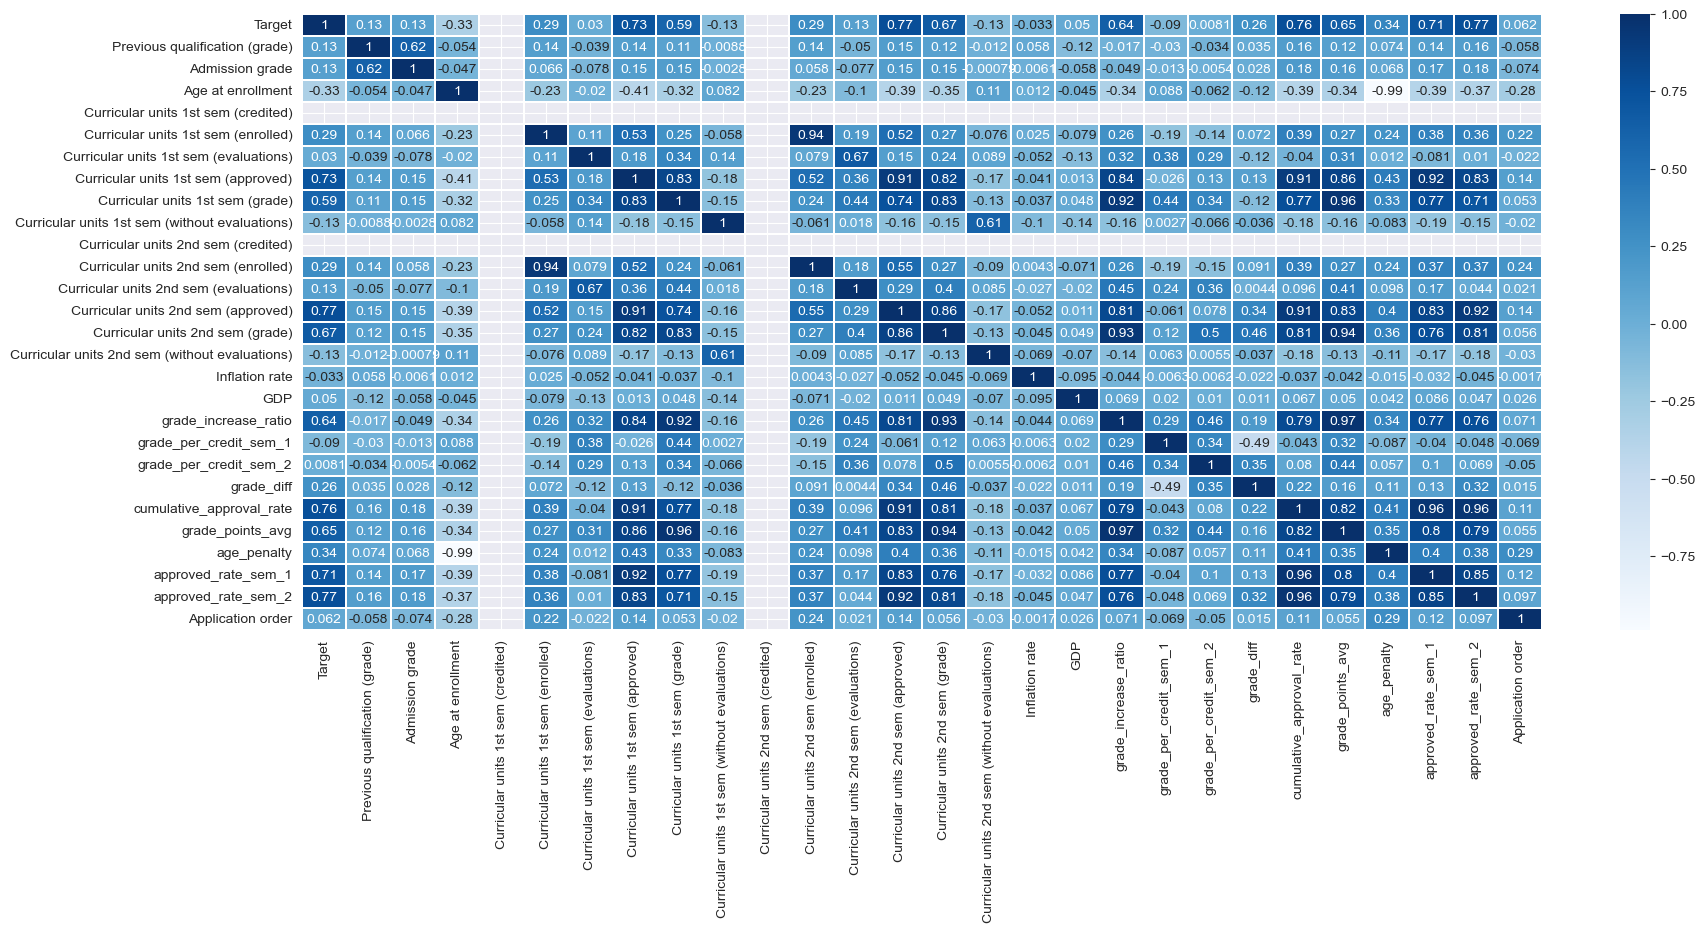

In [67]:
#correlation 
corr_train = pd.concat([clean_target_data, X_train_scaled_df], axis = 1).corr()
plt.figure(figsize  = (20, 8))
sns.heatmap(corr_train, annot = True, cmap = "Blues", linewidth = 0.1)

<Axes: >

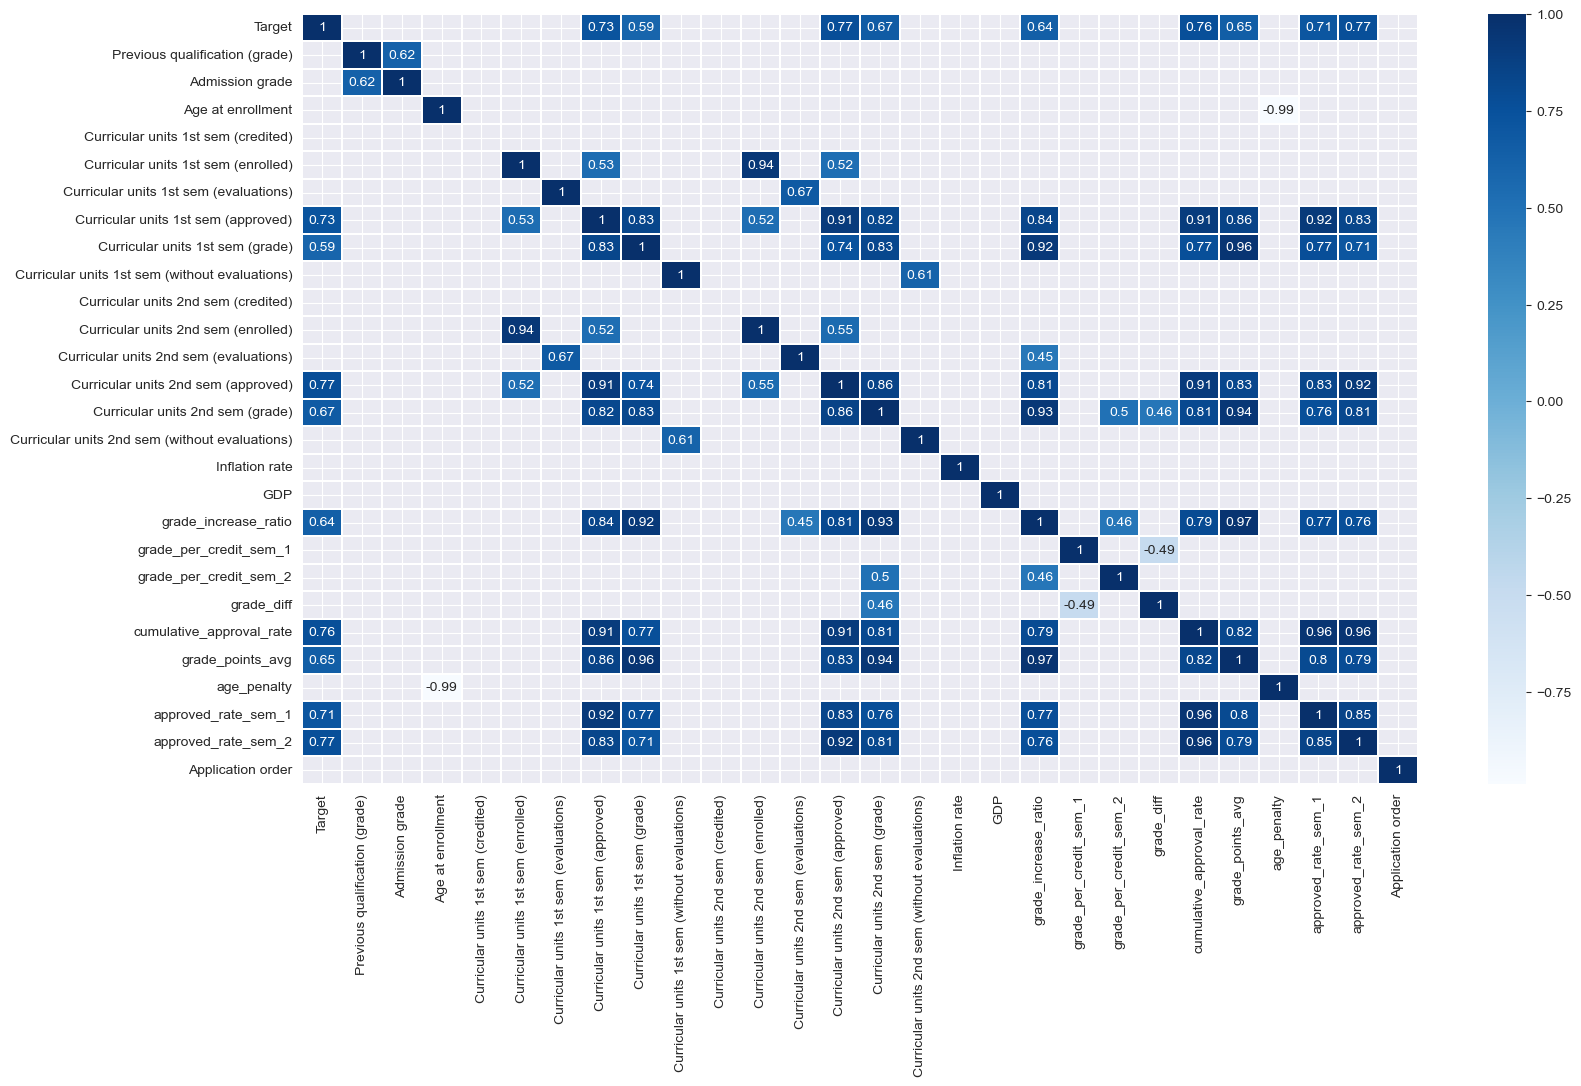

In [68]:
plt.figure(figsize= (18, 10))
sns.heatmap(corr_train[(corr_train >= 0.45) | (corr_train <= -0.45)], annot = True, linewidth = 0.1, cmap = 'Blues')

In [69]:
corr_train['Target']

Target                                            1.000000
Previous qualification (grade)                    0.129501
Admission grade                                   0.131043
Age at enrollment                                -0.332569
Curricular units 1st sem (credited)                    NaN
Curricular units 1st sem (enrolled)               0.291858
Curricular units 1st sem (evaluations)            0.030106
Curricular units 1st sem (approved)               0.727606
Curricular units 1st sem (grade)                  0.588689
Curricular units 1st sem (without evaluations)   -0.130334
Curricular units 2nd sem (credited)                    NaN
Curricular units 2nd sem (enrolled)               0.291331
Curricular units 2nd sem (evaluations)            0.134098
Curricular units 2nd sem (approved)               0.774744
Curricular units 2nd sem (grade)                  0.671316
Curricular units 2nd sem (without evaluations)   -0.131199
Inflation rate                                   -0.0329

extracted features appear to have high correlation with target 

# Model Implementation

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

def performance(y_tests, y_pred, y_proba):

    #model evaluation 
    print(f"Model's accuracy: {accuracy_score(y_tests, y_pred)}")
    
    cm = confusion_matrix(y_pred, y_tests)
    plt.figure(figsize = (5, 5))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', yticklabels=['Drop Out', 'Graduate'], xticklabels=['Drop Out', 'Graduate'])
    plt.ylabel('predictions')
    plt.xlabel('Real values')
    plt.title('confusion matrix')
    plt.show()
    
    print(classification_report(y_tests, y_pred))
    
    fpr, tpr, _ = roc_curve(y_tests, y_proba)
    auc_rf = roc_auc_score(y_tests, y_proba)
    
    # Plot
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"Model (AUC = {auc_rf:.3f})", color='blue')
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.legend(loc="upper left")  
    plt.show()

we will train the model on the whole old data before any preprocessing to evaluate the progress of the project

In [73]:
features = pd.concat([
                numerical_data.drop(added_numerical_features, axis = 1),
                nominal_df.drop(["improved_0", "improved_1"], axis = 1),
                ordinal_df], axis=1)



X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(features, target_data.map({"Dropout": 0, "Graduate": 1}), test_size=0.2, random_state=42)

print(features.shape)
print(target_data.shape)
print(f"X_Train shape: {X_train_raw.shape}")
print(f"X_Test shape: {X_test_raw.shape}")
print(f"y_Train shape: {y_train_raw.shape}")
print(f"y_Test shape: {y_test_raw.shape}")

(3630, 225)
(3630,)
X_Train shape: (2904, 225)
X_Test shape: (726, 225)
y_Train shape: (2904,)
y_Test shape: (726,)


C:\Users\youss\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model's accuracy: 0.9077134986225895


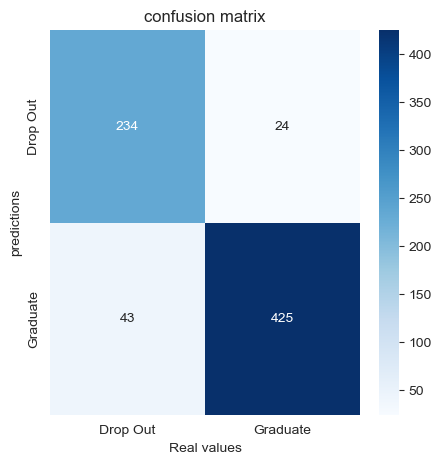

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



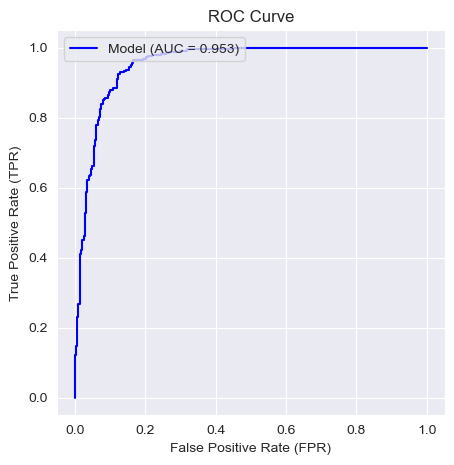

Model's log loss value: 0.24083816165466096


In [74]:
from sklearn.linear_model import LogisticRegression

lr_raw = LogisticRegression()
lr_raw.fit(X_train_raw, y_train_raw)
lr_raw_pred = lr_raw.predict(X_test_raw)
lr_raw_proba = lr_raw.predict_proba(X_test_raw)[:, 1]
performance(y_test_raw, lr_raw_pred, lr_raw_proba)
print(f"Model's log loss value: {log_loss(y_test_raw, lr_raw_proba)}")

In [75]:
print(clean_features.shape)
print(clean_target_data.shape)

print(f"X_Train shape: {X_train_final.shape}")
print(f"X_Test shape: {X_test_final.shape}")
print(f"y_Train shape: {y_train.shape}")
print(f"y_Test shape: {y_test.shape}")

(2589, 210)
(2589,)
X_Train shape: (2071, 210)
X_Test shape: (518, 210)
y_Train shape: (2071,)
y_Test shape: (518,)


Model's accuracy: 0.9382239382239382


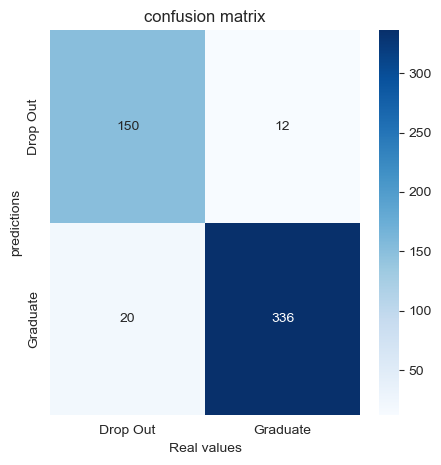

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       170
           1       0.94      0.97      0.95       348

    accuracy                           0.94       518
   macro avg       0.93      0.92      0.93       518
weighted avg       0.94      0.94      0.94       518



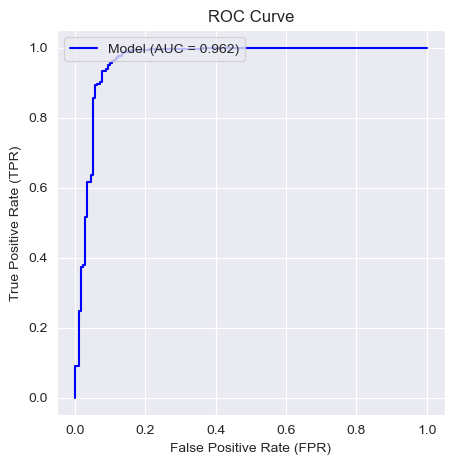

Model's log loss value: 0.1803107402820393


In [76]:
from sklearn.linear_model import LogisticRegression

lr_clean = LogisticRegression(solver='newton-cg')
lr_clean.fit(X_train_final, y_train)
lr_clean_pred = lr_clean.predict(X_test_final)
lr_clean_proba = lr_clean.predict_proba(X_test_final)[:, 1]
performance(y_test, lr_clean_pred, lr_clean_proba)
print(f"Model's log loss value: {log_loss(y_test, lr_clean_proba)}")

# perceprton implementation

In [77]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(
    hidden_layer_sizes=(80, 10), 
    activation='relu',           
    solver='adam',              
    learning_rate='adaptive',    
    max_iter=400,                
    verbose=True,
    random_state=42,
    n_iter_no_change = 50
)

In [78]:
mlp.fit(X_train_final, y_train)

Iteration 1, loss = 0.56271631
Iteration 2, loss = 0.40401101
Iteration 3, loss = 0.32235767
Iteration 4, loss = 0.27837433
Iteration 5, loss = 0.25388727
Iteration 6, loss = 0.23694306
Iteration 7, loss = 0.22215664
Iteration 8, loss = 0.20963129
Iteration 9, loss = 0.20185922
Iteration 10, loss = 0.19271905
Iteration 11, loss = 0.18742865
Iteration 12, loss = 0.18189216
Iteration 13, loss = 0.17671958
Iteration 14, loss = 0.17212849
Iteration 15, loss = 0.16842950
Iteration 16, loss = 0.16399046
Iteration 17, loss = 0.16028030
Iteration 18, loss = 0.15619789
Iteration 19, loss = 0.15292536
Iteration 20, loss = 0.15011019
Iteration 21, loss = 0.14616674
Iteration 22, loss = 0.14219449
Iteration 23, loss = 0.13867941
Iteration 24, loss = 0.13647441
Iteration 25, loss = 0.13151427
Iteration 26, loss = 0.12816878
Iteration 27, loss = 0.12392191
Iteration 28, loss = 0.12119166
Iteration 29, loss = 0.11713633
Iteration 30, loss = 0.11312358
Iteration 31, loss = 0.11126188
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(80, 10), learning_rate='adaptive',
              max_iter=400, n_iter_no_change=50, random_state=42, verbose=True)

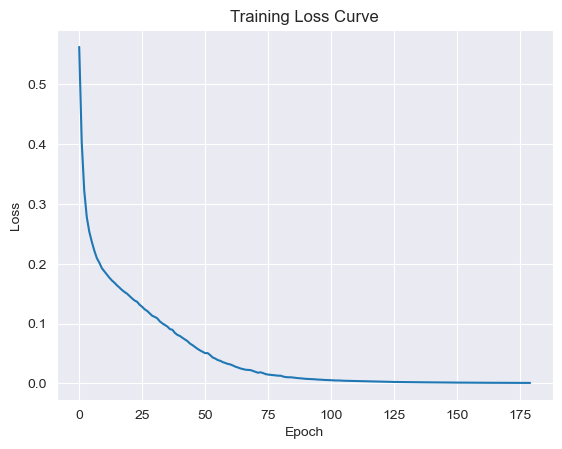

In [79]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


✅ Evaluation:
Model's accuracy: 0.9478764478764479


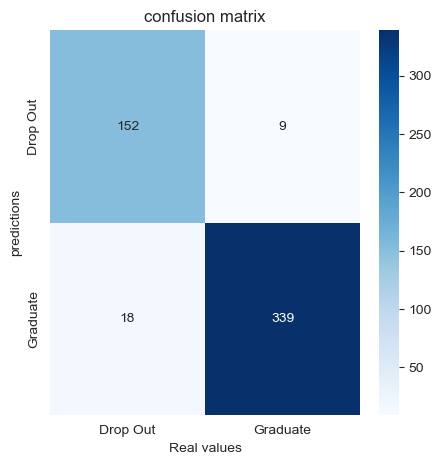

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       170
           1       0.95      0.97      0.96       348

    accuracy                           0.95       518
   macro avg       0.95      0.93      0.94       518
weighted avg       0.95      0.95      0.95       518



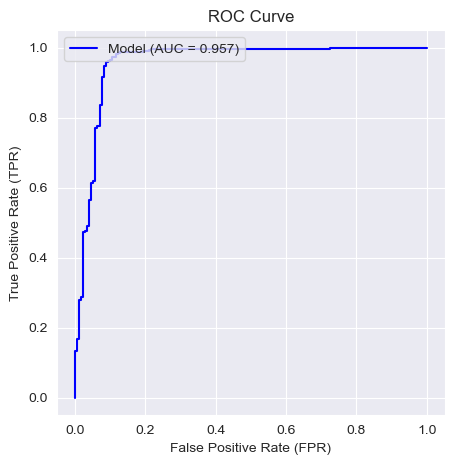

In [80]:
y_pred = mlp.predict(X_test_final)
y_proba = mlp.predict_proba(X_test_final)[:, 1]
print("\n✅ Evaluation:")
performance(y_test, y_pred, y_proba)

In [81]:
print("\n🧠 Model Internals:")
print(f"Epochs completed: {mlp.n_iter_}")
print(f"Best validation loss: {mlp.best_loss_:.4f}")
print(f"Number of layers (including input/output): {len(mlp.coefs_) + 1}")
print(f"Shape of input-to-1st hidden weights: {mlp.coefs_[0].shape}")
print(f"Shape of hidden-to-output weights: {mlp.coefs_[-1].shape}")


🧠 Model Internals:
Epochs completed: 180
Best validation loss: 0.0009
Number of layers (including input/output): 4
Shape of input-to-1st hidden weights: (210, 80)
Shape of hidden-to-output weights: (10, 1)


# saving model for usage and deployment

In [82]:
import joblib

# Save model and scalers
joblib.dump(mlp, 'mlp_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(onehot_encoder, 'nominal_encoder.pkl')  # e.g., OneHotEncoder
joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')  # if applicable
print("✅Model Saved Successfully")

✅Model Saved Successfully
